In [1]:
.libPaths()

[1] "/Library/Frameworks/R.framework/Versions/4.0/Resources/library"

## 1. 环境设置

In [13]:
library(R2OpenBUGS)
library(coda)
library(deSolve)
library(ggplot2)
library(lattice)

In [14]:
library(reshape2)

In [15]:
library(gganimate)
# library(chron)

In [16]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

## 2. 读取患者实际数据

In [6]:
t_obv <- c(0,15,30,45,60,75,90,105,120,150,180,210,240) 
Cp <- c(169.6461713,954.4496945,2891.077537,2247.323963,1487.550285,1209.839388,851.8473932,681.2782777,546.4481697,392.8832977,257.2004695,148.3030868,110.808479)
score<-c(47.41935484,45,41.4516129,30.80645161,27.25806452,23.22580645,22.58064516,24.03225806,25,36.12903226,39.51612903,37.09677419,42.09677419)

## 3. 理论参数模型

> Adamiak U, Kaldonska M, Klodowska-Duda G, Wyska E, Safranow K, Bialecka M, Gawronska-Szklarz B. Pharmacokinetic-pharmacodynamic modeling of levodopa in patients with advanced Parkinson disease. Clin Neuropharmacol. 2010 May;33(3):135-41. doi: 10.1097/WNF.0b013e3181d47849. PMID: 20216409.

### 3.1. 单次给药模拟

In [335]:
## 理论参数
Ke0 <- 0.95/60
K<-0.81/60
E0<-46
Emax<-29
Ec50<-800
gamma<-9

In [6]:
## ODE
## 间接效应PK-PD模型
PKPD <- function(t, y, parms) {
  dCe_dt <- Ke0*(y[1]-y[2])
  dCp_dt <- -Ke0*(y[1]-y[2])-K*y[1]
  list(c(dCp_dt,dCe_dt))
  }
yini <- c(Cp = 3000, Ce = 0) #ng/mL
times <- seq(from = 0, to = 240, by = 1)
out_st <- ode(times = times, y = yini, func = PKPD, parms = NULL)

In [7]:
out_st <- as.data.frame(out_st)
out_st$E<-(E0-Emax*out_st$Ce^gamma/(Ec50^gamma+out_st$Ce^gamma))
## S型Emax模型
out_real <- data.frame(grid = t_obv, r_score = score)

In [10]:
head(out_st)

,time,Cp,Ce,E
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,3000.000,0.00000,46.00000
2,1,2913.645,46.44159,46.00000
3,2,2830.495,90.82254,46.00000
4,3,2750.425,133.22458,46.00000
5,4,2673.316,173.72623,45.99997
6,5,2599.054,212.40293,45.99981


In [165]:
E_t_st <- ggplot() +
  geom_line(aes(x = time,y = E,colour = "blue"),data=out_st, show.legend = TRUE) +
#   geom_line(aes(y = Ce, colour = "green")) +
  geom_point(aes(x = grid, y = r_score, colour = "red"), data=out_real, show.legend = TRUE) + 
  ylab(label = "Effects_Score") +
  xlab(label = "Time(min)") +
  scale_colour_manual(name = "Effects",
                      labels = c("Pop", "Ind"),
                      values = c("red", "blue")) + 
  transition_reveal(time)+
  coord_cartesian(xlim = c(-10, 250)) + 
  theme_bw()

In [166]:
C_t_st <- ggplot(aes(x = time),data=out_st) +
  geom_line(aes(y = Cp,colour = "darkgreen"), show.legend = TRUE) +
  geom_line(aes(y = Ce, colour = "orange")) +
  ylab(label = "Concentation(ng/mL)") +
  xlab(label = "Time(min)") +
  scale_colour_manual(name = "Comparts",
                      labels = c("Cp", "Ce"),
                      values = c("darkgreen", "darkorange")) + 
  transition_reveal(time)+
  coord_cartesian(xlim = c(-10, 250)) + 
  theme_bw()

```r
out_st_all= melt(out_st,c('time'))

allinone_st <- ggplot()+
  geom_line(data =out_st_all, aes(x = time, y = value,color = variable),
            size = 1)+
  theme_bw()+
  theme(
#     axis.text =  element_text(face = 'bold',color = 'black',size = 12),
#     axis.title =  element_text(face = 'bold',color = 'black',size = 14, hjust = .5),
#     legend.text = element_text(face = 'bold',color = 'black',size = 12),
#     legend.title = element_blank(),
#     legend.position = 'bottom',
#     legend.direction = 'horizontal',
    strip.background = element_blank(), strip.placement = "outside"
  )+
  geom_point(aes(x = grid, y = r_score, colour = "Real_data"), data=out_real, show.legend = TRUE) +
  facet_wrap(~variable, scales = 'free_y',ncol = 1,labeller = as_labeller(
      c(Cp = "Cp Conc(ng/mL)", Ce = "Ce Conc(ng/mL)", E='Score' )) ,strip.position = "left")+
  
  xlab('Time')+
  labs(y = NULL)+
  scale_colour_manual(name = "Comparts",
                      labels = c("Cp", "Ce",'E','real'),
                      values = c("darkgreen", "darkorange",'red','blue'))
#   ylab('Value')
```

In [112]:
anim_save("./images/E_t_st.gif", E_t_st, width = 800, height = 250)
anim_save("./images/C_t_st.gif", C_t_st, width = 800, height = 250)


Rendering [--------------------------------------------] at 4.4 fps ~ eta: 22s

Rendering [>-------------------------------------------] at 4.2 fps ~ eta: 23s

Rendering [>-------------------------------------------] at 4.1 fps ~ eta: 24s

Rendering [=>------------------------------------------] at 4.1 fps ~ eta: 24s

Rendering [=>------------------------------------------] at 4.1 fps ~ eta: 23s

Rendering [==>-------------------------------------------] at 4 fps ~ eta: 23s

Rendering [===>----------------------------------------] at 3.7 fps ~ eta: 25s

Rendering [===>----------------------------------------] at 3.8 fps ~ eta: 24s

Rendering [====>---------------------------------------] at 3.8 fps ~ eta: 23s

Rendering [====>---------------------------------------] at 3.9 fps ~ eta: 23s

Rendering [=====>--------------------------------------] at 3.9 fps ~ eta: 22s

Rendering [======>-------------------------------------] at 3.9 fps ~ eta: 22s

Rendering [======>---------------------

![](./images/C_t_st.gif)
![](./images/E_t_st.gif)

### 3.2. 多次给药模拟

In [246]:
mult_drug_dosing<-function(n=1,gap=90,dose=3000){
    times <- seq(from = 0, to = gap, by = 1)
    for (i in 1:n){
        if (i==1){
            Cpi=dose
            Cei=0
            df=ode(times = times, y = c(Cp = Cpi, Ce = Cei), func = PKPD, parms = NULL)
            df <- as.data.frame(df)
            df$E<-(E0-Emax*df$Ce^gamma/(Ec50^gamma+df$Ce^gamma))
#             print(df)
        } else {
            Cpi=dose+df$Cp[dim(df)[1]]
            Cei=df$Ce[dim(df)[1]]
            
            temp_df=ode(times = times, y = c(Cp = Cpi, Ce = Cei), func = PKPD, parms = NULL)
            temp_df <- as.data.frame(temp_df)
            temp_df$E<-(E0-Emax*temp_df$Ce^gamma/(Ec50^gamma+temp_df$Ce^gamma))
            temp_df$time=temp_df$time+gap*(i-1)
            df<-rbind(df[0:(dim(df)[1]-1),],temp_df)
        }
    }
    return(df)
}

In [337]:
dftest=mult_drug_dosing(n=15,gap=200,dose=3000)

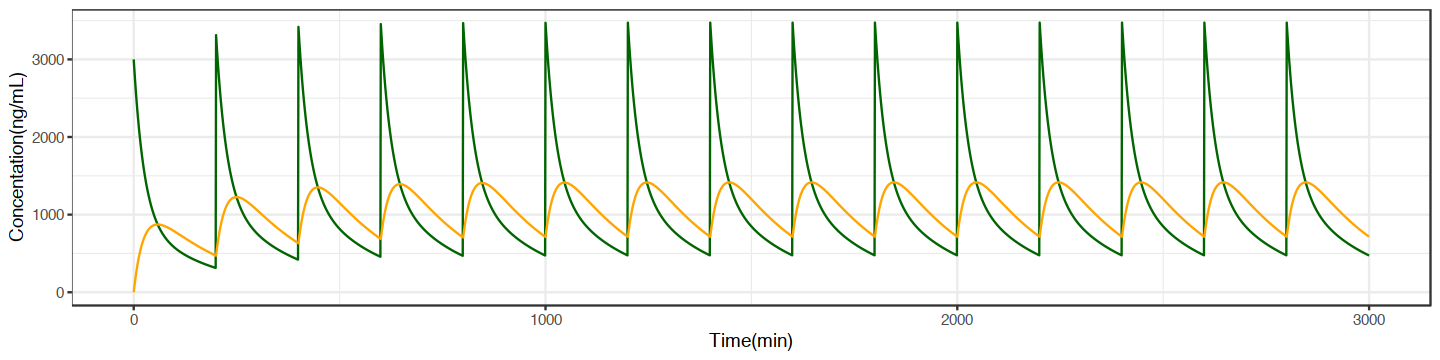

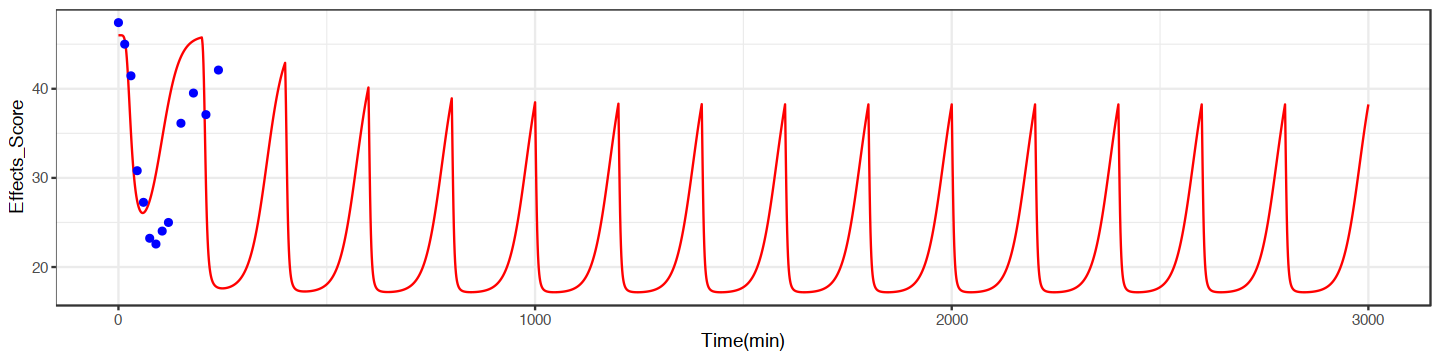

In [338]:
fig(12,3)

CpCe_trend <- ggplot(dftest,aes(x = time)) +
  geom_line(aes(y = Cp), colour = "darkgreen") +
  geom_line(aes(y = Ce), colour = "orange") +
  ylab(label = "Concentation(ng/mL)") +
  xlab(label = "Time(min)") +
#   scale_colour_manual(name = "Effects",
#                       labels = c("Pop", "Ind"),
#                       values = c("red", "blue")) + 
  theme_bw()
CpCe_trend

E_trend <- ggplot(dftest,aes(x = time)) +
  geom_line(aes(y = E), colour = "red") +
#   geom_line(aes(y = Ce, colour = "green")) +
  geom_point(aes(x = grid, y = score), out_real, colour = "blue", show.legend = FALSE) + 
  ylab(label = "Effects_Score") +
  xlab(label = "Time(min)") +
  scale_colour_manual(name = "Effects",
                      labels = c("Pop", "Ind"),
                      values = c("red", "blue")) + 
  theme_bw()
E_trend

## 4. 个性化参数推导

### 4.1. MCMC建模

In [301]:
model <-    
paste(" 
model {
  solution[1:ngrid, 1:ndim] <- ode(init[1:ndim], 
                                   tgrid[1:ngrid], 
                                   D(C[1:ndim], t), 
                                   origin, 
                                   tol) 

    Ke ~ dunif(0, 0.03) 
    K ~ dunif(0, 0.03) 
#     E ~ dunif(36, 56) 
#     Emax ~ dunif(700, 900)
    Ec50 ~ dunif(700, 900)
#     gamma ~ dunif(1, 15)

    E <- 46
    Emax <- 29
    gamma <- 9

    D(C[2], t) <- Ke * (C[1] - C[2])
    D(C[1], t) <- -Ke * (C[1] - C[2])-K*C[1]

    

    for (i in 1:ngrid){
        obv_equ[i] <- E-Emax*pow(solution[i, 2],gamma)/(pow(Ec50,gamma)+pow(solution[i, 2],gamma))
        obs_x[i] ~ dnorm(obv_equ[i], tau.x)
    }
    tau.x <- 1/var.x
    var.x <- 1/(sd.x*sd.x)
    sd.x ~ dunif(0, 5)
}
")
writeLines(model,"levodopa.txt")   


### 4.2. 模型拟合个体参数

In [302]:
data <- list(
ndim = 2, 
origin = 0, 
tol = 1.0E-3, 
ngrid = 13,
init = c(3000, 0),
tgrid = t_obv, 
obs_x = score)

In [303]:
init1 <- list(
  Ke = runif(1, 0, 0.03), 
  K = runif(1, 0, 0.03), 
  Ec50 = runif(1,700, 900),
#   E = runif(1, 36, 56), 
#   Emax = runif(1,700, 900),
#   gamma = runif(1,1, 15),
  sd.x = 1)
init2 <- list(
  Ke = runif(1, 0, 0.03), 
  K = runif(1, 0, 0.03), 
  Ec50 = runif(1,700, 900),
#   E = runif(1, 36, 56), 
#   Emax = runif(1,700, 900),
#   gamma = runif(1,1, 15),
  sd.x = 4)
inits <- list(init1,init2)

In [304]:
parameters <- c('Ke','K','Ec50')

In [305]:
shaun.sim <- bugs(
  data = data, 
  inits = inits, 
  codaPkg = TRUE,
  model.file = 'levodopa.txt', 
  parameters=parameters, 
  n.chains = 2, 
  n.iter = 2000, 
  n.burnin = 300,
  useWINE = TRUE, 
  OpenBUGS.pgm = "/Users/esther/.wine/drive_c/Program Files/OpenBUGS/OpenBUGS323/OpenBUGS.exe",
  WINE = "/Applications/Wine.app/Contents/Resources/wine/bin/wine", 
  WINEPATH = "/Applications/Wine.app/Contents/Resources/wine/bin/winepath",
  working.directory = getwd(),
  debug=FALSE)

### 4.3. 拟合结果

In [306]:
fig(8,8)

Abstracting Ec50 ... 1700 valid values
Abstracting K ... 1700 valid values
Abstracting Ke ... 1700 valid values
Abstracting deviance ... 1700 valid values
Abstracting Ec50 ... 1700 valid values
Abstracting K ... 1700 valid values
Abstracting Ke ... 1700 valid values
Abstracting deviance ... 1700 valid values


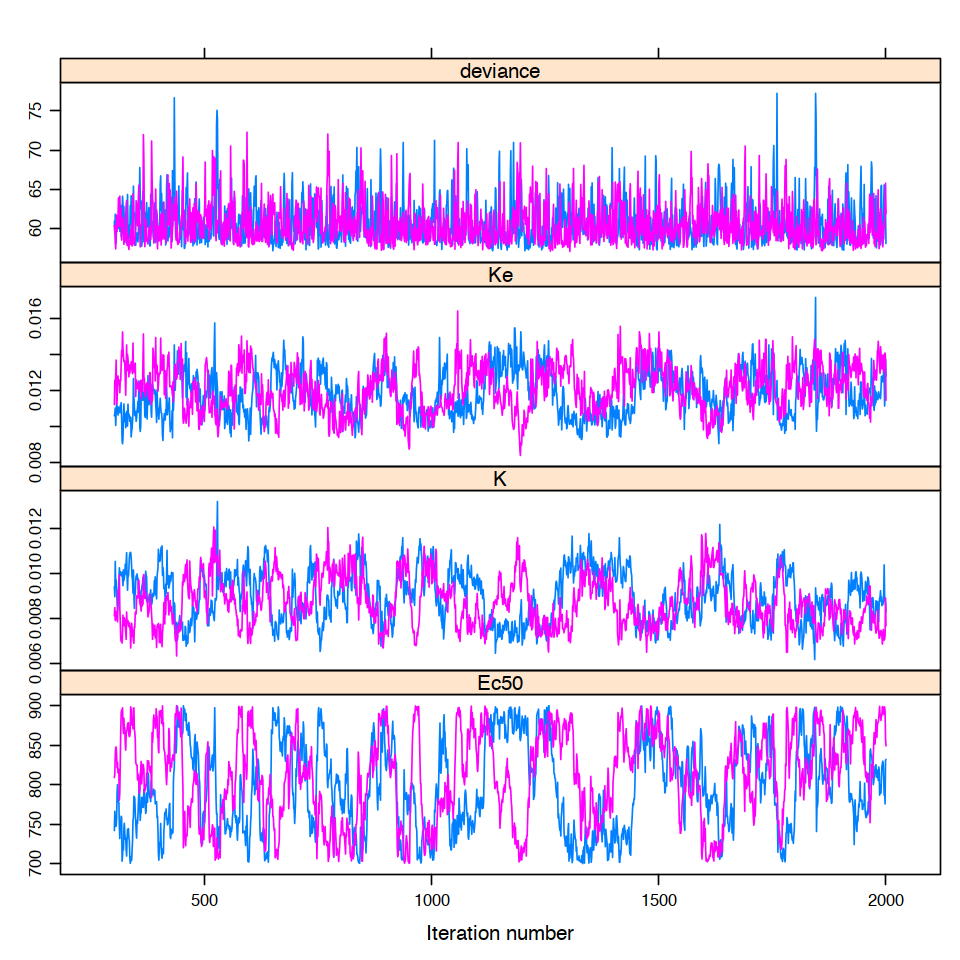

In [307]:
out.coda <- read.bugs(shaun.sim)
xyplot(out.coda)

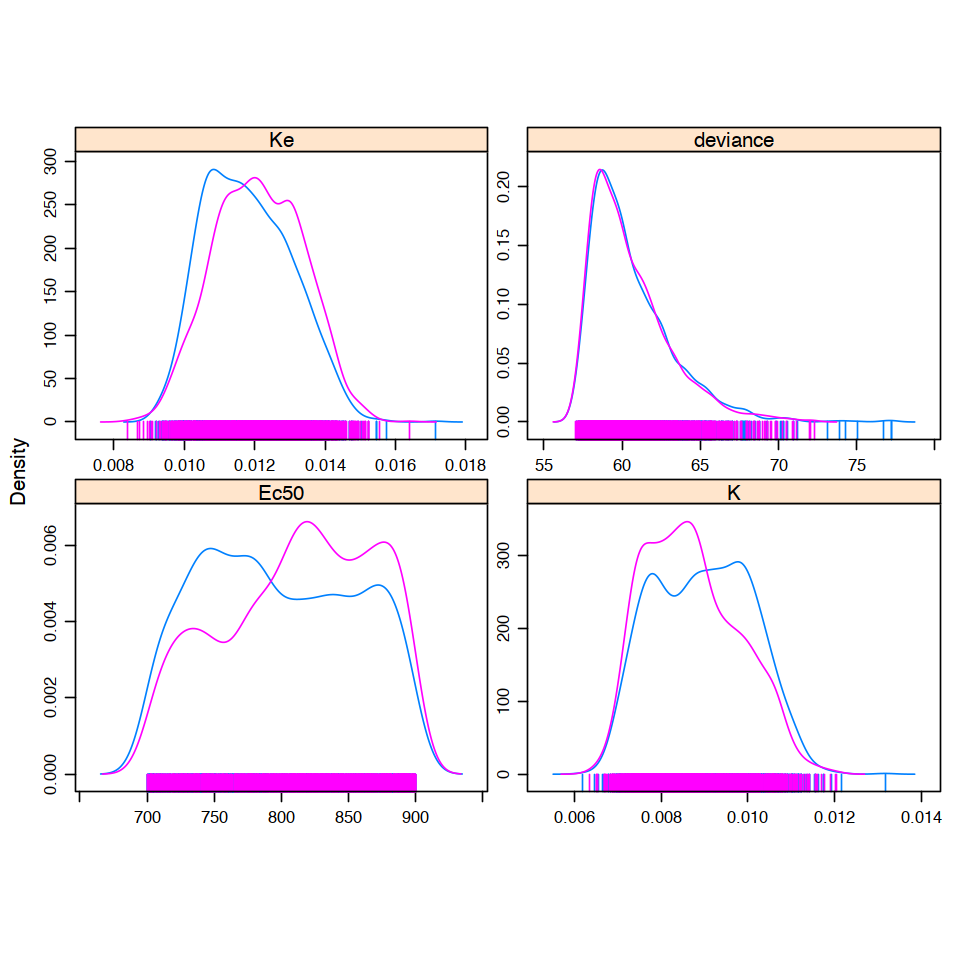

In [308]:
densityplot(out.coda) 

In [309]:
gelman.diag(out.coda) 

Potential scale reduction factors:

         Point est. Upper C.I.
Ec50           1.04       1.16
K              1.03       1.14
Ke             1.03       1.12
deviance       1.01       1.01

Multivariate psrf

1.03

In [310]:
out.summary <- summary(out.coda, q = c(0.025, 0.975))
out.summary


Iterations = 301:2000
Thinning interval = 1 
Number of chains = 2 
Sample size per chain = 1700 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean        SD  Naive SE Time-series SE
Ec50     8.054e+02 56.398834 9.672e-01      6.1837333
K        8.833e-03  0.001106 1.896e-05      0.0001077
Ke       1.196e-02  0.001252 2.148e-05      0.0001156
deviance 6.059e+01  2.590942 4.443e-02      0.0715919

2. Quantiles for each variable:

              2.5%     97.5%
Ec50     7.069e+02 894.70000
K        7.051e-03   0.01092
Ke       9.769e-03   0.01432
deviance 5.748e+01  67.08025


### 4.4. 结果验证

In [339]:
K <- out.summary$statistics[,'Mean']['K']
# K <- 0.81/60
Ke0 <- out.summary$statistics[,'Mean']['Ke']
# Ke0 <- 0.95/60
Ec50 <-out.summary$statistics[,'Mean']['Ec50']
# Ec50 <- 600
# gamma <- 7

# yini <- c(Cp = 3000, Ce = 0)
# times <- seq(from = 0, to = 240, by = 1)

out_post <- ode(times = times, y = yini, func = PKPD, parms = NULL)
out_post <- as.data.frame(out_post)
out_post$E<-(E0-Emax*out_post$Ce^gamma/(Ec50^gamma+out_post$Ce^gamma))

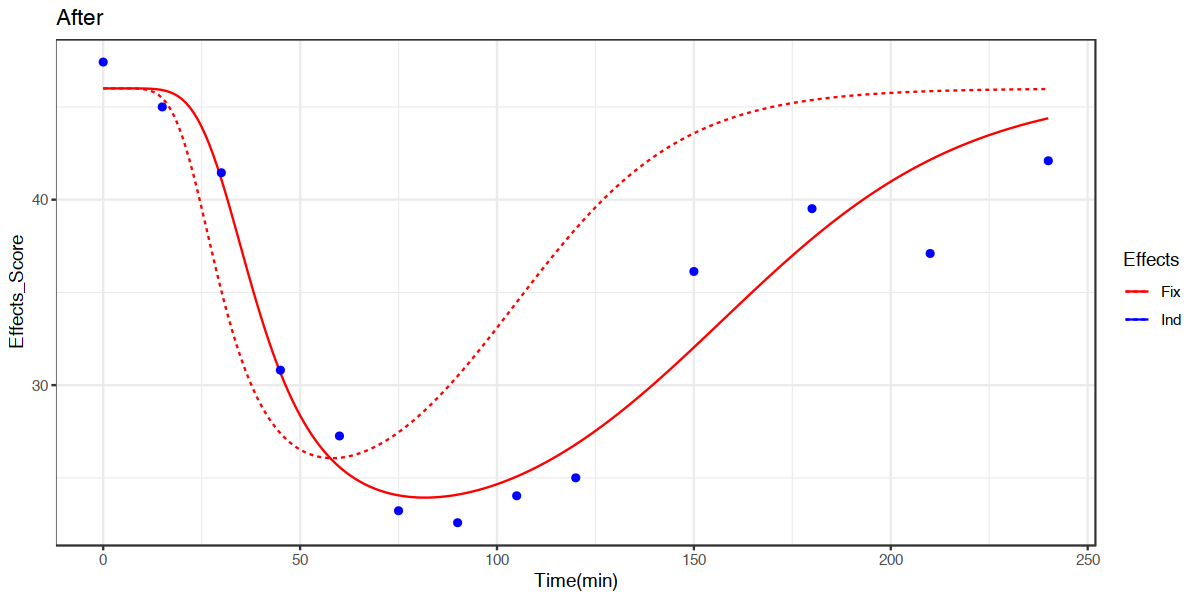

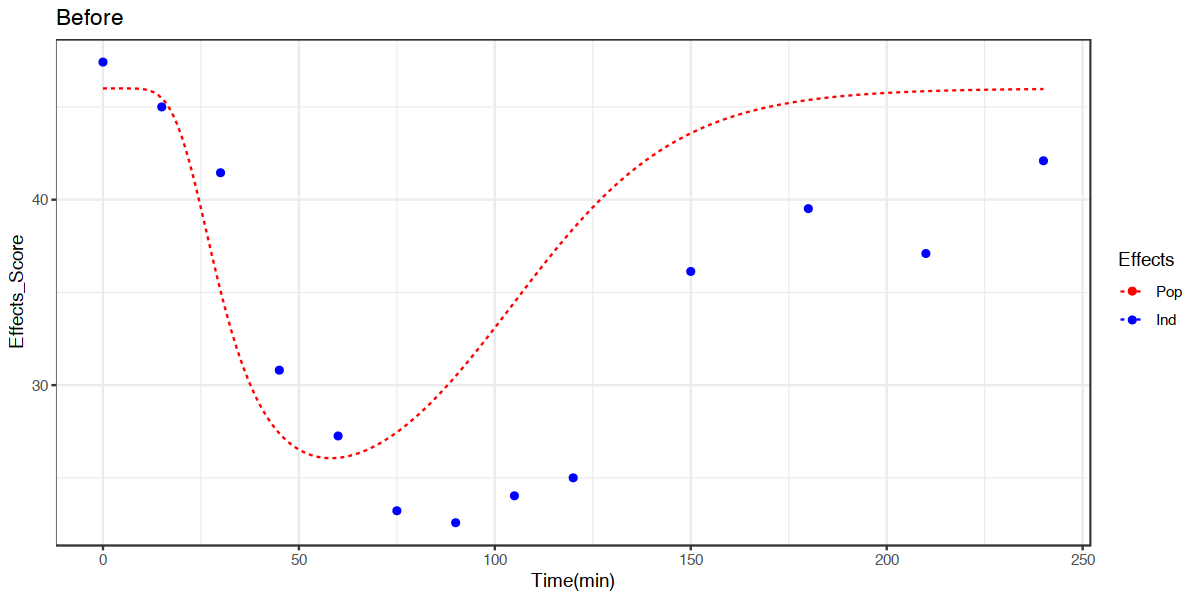

In [341]:
fig(10,5)
res_post <- ggplot(out_post,aes(x = time)) +
  geom_line(aes(y = E , colour = "blue")) +
geom_line(aes(x = time,y = E,colour = "blue"),data=out_st, show.legend = TRUE,linetype=2) +
#   geom_line(aes(y = Ce, colour = "green")) +
  geom_point(aes(x = grid, y = r_score, colour = "yellow"), out_real, show.legend = FALSE) + 
  labs(title="After", y="Effects_Score", x="Time(min)")+
  scale_colour_manual(name = "Effects",
                      labels = c("Fix", "Ind","af"),
                      values = c("red", "blue","green")) + 
  theme_bw()
res_post

E_t_st_comp <- ggplot() +
  geom_line(aes(x = time,y = E,colour = "blue"),data=out_st, show.legend = TRUE,linetype=2) +
#   geom_line(aes(y = Ce, colour = "green")) +
  geom_point(aes(x = grid, y = r_score, colour = "red"), data=out_real, show.legend = TRUE) + 
  labs(title="Before", y="Effects_Score", x="Time(min)")+
#   ylab(label = "Effects_Score") +
#   xlab(label = "Time(min)") +
  scale_colour_manual(name = "Effects",
                      labels = c("Pop", "Ind"),
                      values = c("red", "blue")) + 
#   transition_reveal(time)+
#   coord_cartesian(xlim = c(-10, 250)) + 
  theme_bw()
E_t_st_comp

### 4.5. 结果应用

In [314]:
dftest=mult_drug_dosing(n=15,gap=200,dose=3000)

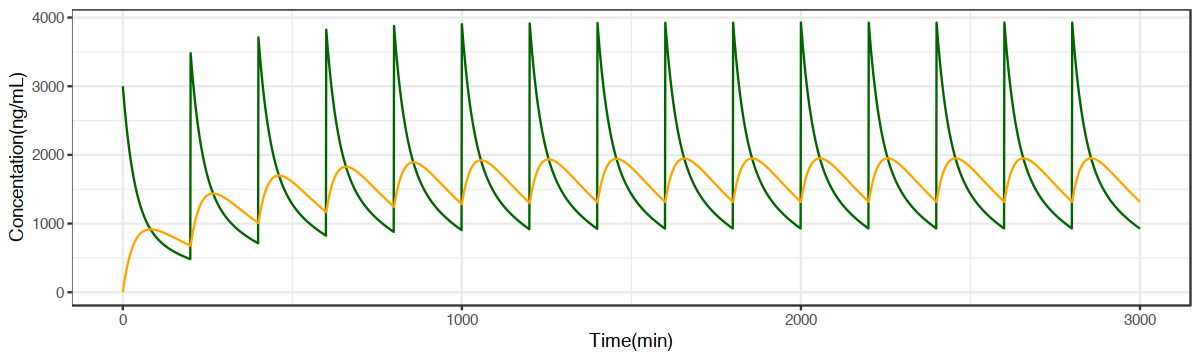

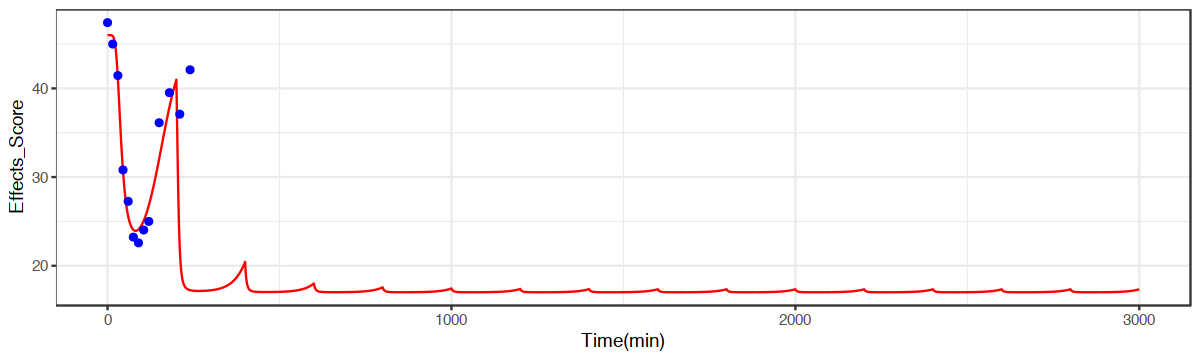

In [315]:
fig(10,3)

CpCe_trend_post <- ggplot(dftest,aes(x = time)) +
  geom_line(aes(y = Cp), colour = "darkgreen") +
  geom_line(aes(y = Ce), colour = "orange") +
  ylab(label = "Concentation(ng/mL)") +
  xlab(label = "Time(min)") +
#   scale_colour_manual(name = "Effects",
#                       labels = c("Pop", "Ind"),
#                       values = c("red", "blue")) + 
  theme_bw()
CpCe_trend_post

E_trend_post <- ggplot(dftest,aes(x = time)) +
  geom_line(aes(y = E), colour = "red") +
#   geom_line(aes(y = Ce, colour = "green")) +
  geom_point(aes(x = grid, y = score), out_real, colour = "blue", show.legend = FALSE) + 
  ylab(label = "Effects_Score") +
  xlab(label = "Time(min)") +
  scale_colour_manual(name = "Effects",
                      labels = c("Pop", "Ind"),
                      values = c("red", "blue")) + 
  theme_bw()
E_trend_post

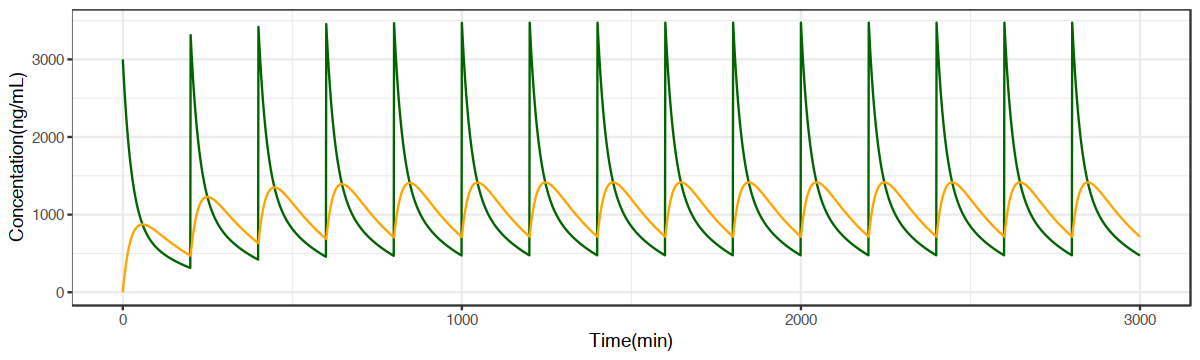

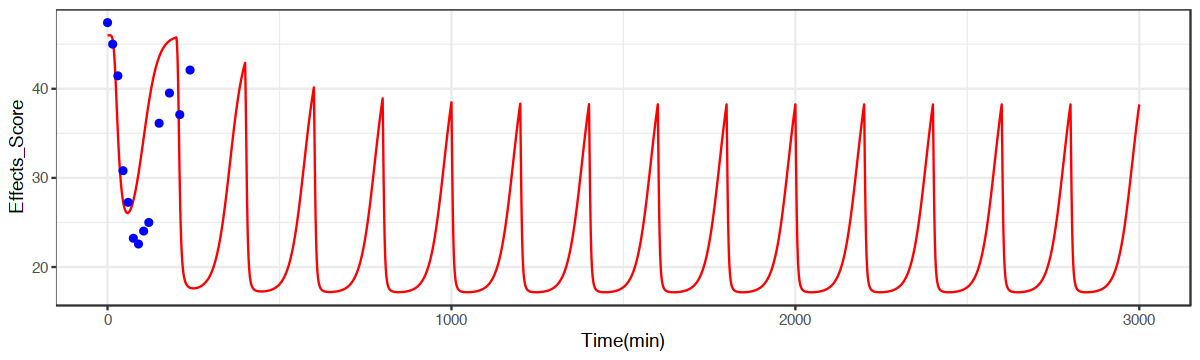

In [343]:
fig(10,3)
CpCe_trend
E_trend